# Notebook V - Terrain Constraints

<hr>
<hr>

## Importing Libraries

In [1]:
'''import supporting libraries'''

import numpy as np
import matplotlib.pyplot as plt
import imageio

import sys
sys.path.append('./code/') # add path to source code directory

## Applying Terrain Constraints

In [2]:
'''importing library'''

import TerrainConstraints
terrain_constraints = TerrainConstraints.TerrainConstraints()

import UtilitiesCalc
obj_utilities = UtilitiesCalc.UtilitiesCalc()

In [3]:
'''reading climate and slope data'''

precipitation = np.load('./sample_data/input/climate/precipitation.npy') # mm / day

slope_map = imageio.imread('./sample_data/input/LAO_Slope.tif'); # Percentage Slope

In [4]:
'''passing climate and slope data'''

terrain_constraints.setClimateTerrainData(precipitation, slope_map)

In [5]:
'''calculation of Fournier index'''

terrain_constraints.calculateFI()

# extraction of Fournier index (FI) if required
# print( terrain_constraints.getFI() )

In [6]:
'''reading yield data'''

yield_map_rain = imageio.imread('./sample_data/output/NB4/CropSuitability_rain_m4.tif');
yield_map_irr = imageio.imread('./sample_data/output/NB4/CropSuitability_irr_m4.tif');

In [7]:
'''applying terrain constraints'''

yield_map_rain_m5 = terrain_constraints.applyTerrainConstraints(yield_map_rain, 'R') # I: Irrigated, R: Rain-fed
yield_map_irr_m5 = terrain_constraints.applyTerrainConstraints(yield_map_irr, 'I') # I: Irrigated, R: Rain-fed

## get classified output
yield_map_rain_class_m5 = obj_utilities.classifyFinalYield(yield_map_rain_m5)
yield_map_irr_class_m5 = obj_utilities.classifyFinalYield(yield_map_irr_m5)

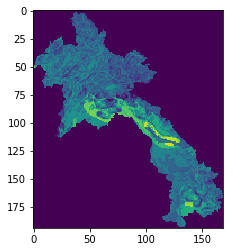

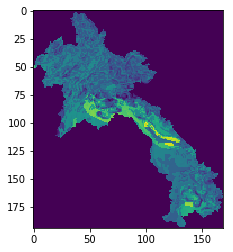

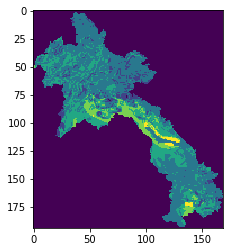

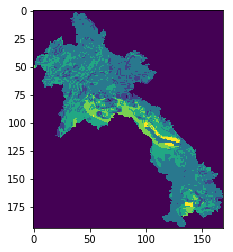

In [8]:
'''visualize result'''

plt.imshow(yield_map_rain_m5)
plt.show()

plt.imshow(yield_map_irr_m5)
plt.show()

plt.imshow(yield_map_rain_class_m5)
plt.show()

plt.imshow(yield_map_irr_class_m5)
plt.show()

In [9]:
'''save result'''

obj_utilities.saveRaster('./sample_data/input/LAO_Admin.tif', './sample_data/output/NB5/CropSuitability_rain_m5.tif', yield_map_rain_m5)
obj_utilities.saveRaster('./sample_data/input/LAO_Admin.tif', './sample_data/output/NB5/CropSuitability_irr_m5.tif', yield_map_irr_m5)

obj_utilities.saveRaster('./sample_data/input/LAO_Admin.tif', './sample_data/output/NB5/CropSuitability_rain_class_m5.tif',yield_map_rain_class_m5)
obj_utilities.saveRaster('./sample_data/input/LAO_Admin.tif', './sample_data/output/NB5/CropSuitability_irr_class_m5.tif',yield_map_irr_class_m5)